Successfully loaded weights from C:\Users\shiyu\OneDrive\Desktop\CAT-GAN\saved_model\gen.pkl!
Successfully loaded weights from C:\Users\shiyu\OneDrive\Desktop\CAT-GAN\saved_model\disc.pkl!
tensor([0.5352, 0.3999, 0.1455, 0.1842, 0.2148, 0.1312, 0.2175, 0.5325, 0.4498,
        0.5081, 0.0468, 0.0821, 0.5580, 0.2261, 0.2268, 0.0838, 0.4509, 0.3847,
        0.7126, 0.0914, 0.0111, 0.3757, 0.6005, 0.5022, 0.1182, 0.0444, 0.2197,
        0.3627, 0.3026, 0.5100, 0.8125, 0.5607, 0.1742, 0.4905, 0.2093, 0.1340,
        0.3874, 0.0552, 0.3015, 0.2963, 0.4558, 0.2288, 0.2495, 0.0329, 0.2298,
        0.4401, 0.0195, 0.3567, 0.3584, 0.3014, 0.2156, 0.5123, 0.0435, 0.5488,
        0.3839, 0.5365, 0.3857, 0.1555, 0.2269, 0.1211, 0.1664, 0.0865, 0.0827,
        0.1351, 0.5659, 0.0613, 0.5245, 0.4947, 0.1575, 0.5705, 0.2637, 0.3899,
        0.2702, 0.7343, 0.4620, 0.1340, 0.3921, 0.3372, 0.2004, 0.3500, 0.0295,
        0.3146, 0.2895, 0.0537, 0.1557, 0.0387, 0.0829, 0.4373, 0.4208, 0.2366,
        0.6

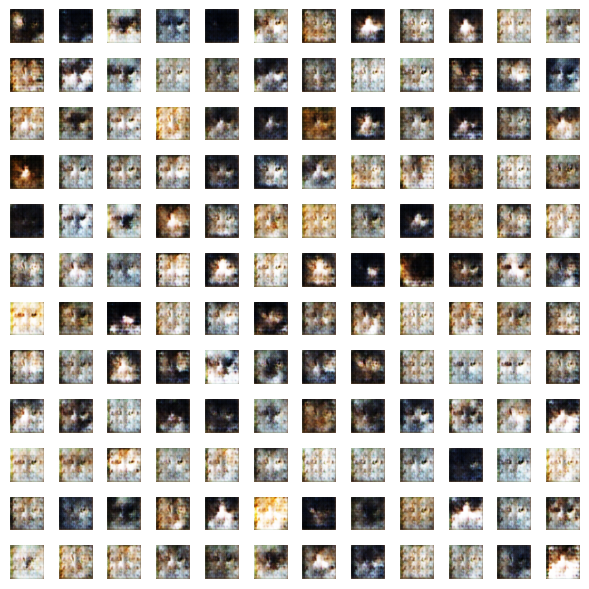

In [100]:
%run network.ipynb
import torch.optim as optim
import random
import os
from PIL import Image
from torchvision import transforms, datasets
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

def main():
    gen = GAN_Gen()
    optim_g = optim.Adam(gen.parameters(), lr=0.1)
    load_w(gen, optim_g, "gen.pkl")
    disc = GAN_Dis()
    optim_d = optim.Adam(disc.parameters(), lr=0.1)
    load_w(disc, optim_d, "disc.pkl")
    seed = torch.normal(0, 1, (144, 128))
    print(disc(gen(seed)))
    images = gen(seed).view(144, 3, 64, 64)
    images_np = images.detach().numpy()
    num_rows, num_cols = 12, 12
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 6))
    axs = axs.flatten()

    for i in range(num_rows * num_cols):
        img = images_np[i].transpose(1, 2, 0)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

def load_w(model, optimizer, name):
    log_dir = os.path.abspath(os.path.expanduser("saved_model"))
    save_path = os.path.join(log_dir, name)
    if os.path.isfile(save_path):
        state_dict = torch.load(
            save_path,
            torch.device('cpu') if not torch.cuda.is_available() else None
        )
        model.load_state_dict(state_dict["model"])
        optimizer.load_state_dict(state_dict["optimizer"])
        print("Successfully loaded weights from {}!".format(save_path))
        return True
    else:
        raise ValueError("Failed to load weights from {}! File does not exist!".format(save_path))

main()   